## Alumno: Diego Akira Alvarado Arroyo

### Usando Fashion_mnist

In [1]:
# Aqui importamos todo lo que usaremos
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [2]:
# Cargando el conjunto de datos FASHION_MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Preprocesando datos
x_train = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=-1))
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=-1))

In [4]:
# Redimensionar imágenes a 48x48 píxeles
x_train = tf.image.resize(x_train, (48, 48))
x_test = tf.image.resize(x_test, (48, 48))

In [5]:
# Normalizar valores de píxeles (escala de 0 a 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Convertir etiquetas 
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
# Definir VGG16 como base convolucional, cargando pesos preentrenados en 'imagenet'
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
# Definir el modelo secuencial
model = models.Sequential()
model.add(vgg_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [8]:
# Congelar la base convolucional (VGG16)
vgg_base.trainable = False

In [9]:
# Compilando el modelo
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Entrenando el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 242s 257ms/step - accuracy: 0.7225 - loss: 0.8075 - val_accuracy: 0.8440 - val_loss: 0.4292
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 243s 259ms/step - accuracy: 0.8380 - loss: 0.4455 - val_accuracy: 0.8567 - val_loss: 0.3945
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 227s 242ms/step - accuracy: 0.8565 - loss: 0.4017 - val_accuracy: 0.8611 - val_loss: 0.3815
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 236s 251ms/step - accuracy: 0.8622 - loss: 0.3746 - val_accuracy: 0.8663 - val_loss: 0.3653
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 238s 254ms/step - accuracy: 0.8651 - loss: 0.3666 - val_accuracy: 0.8700 - val_loss: 0.3635
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 236s 251ms/step - accuracy: 0.8726 - loss: 0.3486 - val_accuracy: 0.8720 - val_loss: 0.3618
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 240s 256ms/step - accuracy: 0.8760 - loss: 0.3401 - val_accuracy: 0.8753 - val_loss: 0.3449
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 231s 247ms/step - accuracy: 0.8765 -

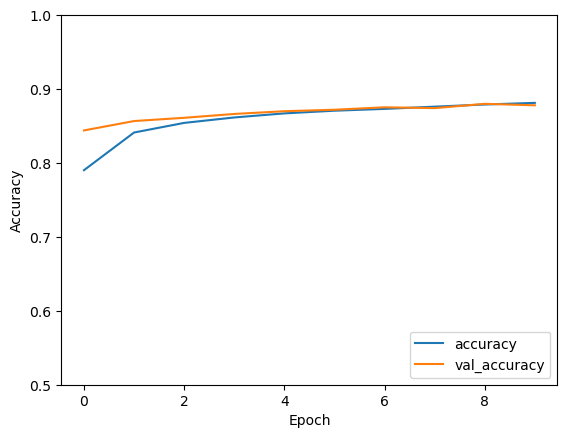

In [11]:
# Graficar el historial de entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()